In [43]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
%matplotlib inline
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
from anndata import AnnData
import scanpy as sc
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import bone
reload(bone)

sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
import SMaRT.MacUtils as mut
reload(mut)

<module 'SMaRT.MacUtils' from '/booleanfs2/sahoo/BoNE/SMaRT/MacUtils.py'>

In [48]:
def getSViP():
    l1 = [bone.readList("covid/iav-list-1.txt")[0:20]] # 20 gene signature
    wt1 = [1]
    return wt1, l1

def getViP():
    l1 = [bone.readList("covid/list-2.txt")] # 166 gene signature
    wt1 = [1]
    return wt1, l1

def getSimpleName(gene_groups, h):
    res = []
    for s in gene_groups:
        s1 = set()
        for g in s:
            for id1 in h.getIDs(g):
                name = h.getSimpleName(id1)
                if name != "" and name != "---":
                    s1.add(name)
        res.append(s1)
    return res

def getMacGeneGroups(order = None, weight = None, debug = 1):
    reload(hu)
    db = hu.Database("/booleanfs2/sahoo/Hegemon/explore.conf")
    h = hu.Hegemon(db.getDataset("GL4"))
    h.init()
    h.initPlatform()
    h.initSurv()
    data_item = []
    dir1 = "/booleanfs2/sahoo/Data/Macrophage/BN/"
    with open(dir1 + 'figures/path-1.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-0.json') as data_file:
        l1 = json.load(data_file)
        data_item[5] = l1[5]
        data_item[6] = l1[6]
    with open(dir1 + 'figures/path-2.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-3.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-4.json') as data_file:
        data_item += json.load(data_file)
    cfile = dir1 + "figures/mac-net-cls.txt"
    if not os.path.isfile(cfile):
        print ("Can't open file {0} <br>".format(cfile))
        exit()
    fp = open(cfile, "r")
    nodelist = {}
    nhash = {}
    for line in fp:
        line = line.strip();
        ll = line.split("\t");
        nodelist[ll[0]] = ll[2:]
        for i in ll[2:]:
            nhash[i] = ll[0];
    fp.close();
    gene_groups = []
    for i in range(len(data_item)):
        gene_groups.append(set())
        gn = data_item[i][2][0][0]
        for g in data_item[i][2]:
            gene_groups[i].add(g[0])
            if g[0] in nodelist:
                for k in nodelist[g[0]]:
                    gene_groups[i].add(k)
        for g in data_item[i][3]:
            gene_groups[i].add(g)
            if g in nodelist:
                for k in nodelist[g]:
                    gene_groups[i].add(k)
        if debug == 1:
            print (i, gn, h.getSimpleName(gn), data_item[i][0], len(gene_groups[i]))
    print([len(s) for s in gene_groups])
    if order is None:
        order = [1, 3, 4, 5];
        order = [35]
        order = [43, 44, 45];
        order = [8, 9, 10]
    gene_groups = [gene_groups[i] for i in order]
    print([len(s) for s in gene_groups])
    gene_groups = getSimpleName(gene_groups, h)
    print([len(s) for s in gene_groups])
    if weight is None:
        weight = [-1, 1, 2, 3]
        weight = [-1, -2, -3]
        weight = [-1]
        weight = [-1, -2, -3]
    print (weight)
    genes = bone.readGenes(dir1 + "figures/cluster-names.txt")
    return genes, weight, gene_groups

def getCls1a2a4():
    order = [1, 2, 4]
    wt1 = [-1, 1, 2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls13a14a3():
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls13():
    order = [13]
    wt1 = [-1]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls14():
    order = [14]
    wt1 = [1]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls1():
    order = [-1]
    wt1 = [1]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls2():
    order = [2]
    wt1 = [1]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls3():
    order = [3]
    wt1 = [1]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls4():
    order = [4]
    wt1 = [1]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls2a4():
    order = [2,4]
    wt1 = [1,2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls14a3():
    order = [14, 3]
    wt1 = [1, 2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getTSHu():
    wt1 = [1]
    l1 = [['DDIT4','GZMB','CAMKK1','GHRL','CLEC10A','DTYMK','PER1','PDK1','NPEPL1',
          'EPHX2','GPCPD1','MS4A3','GNG2','MUM1','IL13RA1','IL1B','STIP1','ID3','DHRS13',
          'CHSY1','MEGF6','NR1D1','AK5','TCN1','ZNF438','CYB561','NSUN3','NR1D2','SLPI',
          'POLH','CD38','PARP2','SYT11','TIAM2','PGPEP1','SH2D1B','CD1C','C12orf75','REM2','LLGL2','FKBP4']]
    return wt1, l1

def getTSMm():
    wt1 = [1]
    l1 = [['Gzmf', 'Gzmc', 'Camkk1', 'Rem2', 'Clec10a', 'Il13ra1', 'Nr1d1', 'Id3', 'Gzmb', 'Gzmg', 'Tiam2', 
          'Syt11', 'Dhrs13', 'Sh2d1b2', 'Polh', 'Pdk1', 'Gng2', 'Gzmd', 'Gzmn', 'Ghrl', 'Parp2', 'Chsy1', 
          'Per1', 'Gpcpd1', 'Nsun3', 'Zfp438', 'Ddit4', 'Npepl1', 'Dtymk', 'Stip1', 'Llgl2', 'Megf6', 'Ms4a3', 
          '1500009L16Rik', 'Il1b', 'Mgl2', 'Sh2d1b1', 'Ephx2', 'Slpi', 'Pgpep1', 'Fkbp4', 'Nr1d2', 'Gzme', 'Cd38', 
          'Ak5', 'Cyb561']]
    return wt1, l1

def getTSC1Mm():
    wt1 = [-1]
    l1 = [['Nr1d1', 'Ephx2', 'Dtymk', 'Tiam2', 'Megf6', 'Cyb561', 'Npepl1', 'Slpi']]
    return wt1, l1

def getSingleGene(gene='Nr1d1'):
    wt1 = [1]
    l1 = [[gene]]
    return wt1, l1

def getKellerGenesMm():
    wt1 = [1]
    l1 = [['Nr1d1','Dbp','Nr1d2','Per2','Per3','Per1','Arntl','Cry1','Nfil3','Cry2','Clock']]
    return wt1, l1

def getKellerGenesC1a2Mm():
    wt1 = [-1, 1]
    l1 = [['Nr1d1','Dbp'],['Per3','Arntl','Cry1','Nfil3']]
    return wt1, l1

def getKellerGenesC1a2a4Mm():
    wt1 = [-1, 1, 2]
    l1 = [['Nr1d1','Dbp'],['Per3','Arntl','Cry1','Nfil3'],['Per1']]
    return wt1, l1

def getKellerGenesC1Mm():
    wt1 = [-1]
    l1 = [['Nr1d1','Dbp']]
    return wt1, l1

def getKellerGenesC2Mm():
    wt1 = [1]
    l1 = [['Per3','Arntl','Cry1','Nfil3']]
    return wt1, l1

def getKellerGenesC4Mm():
    wt1 = [1]
    l1 = [['Per1']]
    return wt1, l1

def getKellerGenesC2a4Mm():
    wt1 = [1, 2]
    l1 = [['Per3','Arntl','Cry1','Nfil3'],['Per1']]
    return wt1, l1

def processOne(ana, order, wt1, ax1, ax2, id1 = None, l1=None, violin=1):
    genes = []
    if (l1 is None):
        nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
        sel = 2
        genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.orderData(l1, wt1)
    if id1 is None:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
                  'genes': genes, 'ax': ax1, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        res = ana.getROCAUC()
        ax.text(len(ana.cval[0]), 4, res)
        if (violin == 1):
            params['ax'] = ax2
            params['vert'] = 0
            ax = ana.printViolin(None, params)
        else:
            ax = ana.densityPlot(ax2, acolor)
        return ana
    else:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
                  'genes': genes, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        if (violin == 1):
            ax = ana.printViolin(None, {'vert':0})
        else:
            ax = ana.densityPlot()
    expr = ana.h.getExprData(id1)
    c = [acolor[ana.aval[i]] for i in ana.order]
    a = [ana.aval[i] for i in ana.order]
    x = [float(expr[i]) for i in ana.order]
    y = [ana.f_ranks[i - ana.h.start] for i in ana.order]
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    df['c'] = c
    df['a'] = a
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    for i in range(len(ana.atypes)):
        cond1 = (df['a'] == i)
        if (sum(cond1) > 0):
            s1 = np.max(df[cond1]['y']) - np.min(df[cond1]['y'])
            s2 = np.max(df[cond1]['x']) - np.min(df[cond1]['x'])
            df.loc[cond1, 'y'] += (np.mean(df[cond1]['x']) - df.loc[cond1, 'x']) * (s1+1) / (s2+1)
            df.loc[cond1, 'x'] -= (np.mean(df[cond1]['y']) - df.loc[cond1, 'y']) * (s2+1) / (s1+1)
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression(normalize=True)
    linreg.fit(np.array(df['x']).reshape(-1, 1),df['y'])
    y_pred = linreg.predict(np.array(df['x']).reshape(-1, 1))
    df['y1'] = (df['y'] - y_pred)
    ax = df.plot('x', 'y1', c=c, kind = 'scatter')
    ana.addAxes(ax)
    ana.f_ranks = df['y1']
    ana.i1 = [ana.order[i] for i in np.argsort(ana.f_ranks)]
    ana.f_ranks = [0 for i in ana.h.aRange()]
    for i in range(len(ana.order)):
        ana.f_ranks[ana.order[i] - ana.h.start] = df['y1'][i]
    index = np.array([i - ana.h.start for i in ana.i1])
    ana.cval = np.array([[ana.aval[i] for i in ana.i1]])
    ana.data = np.array([ana.expr[i] for i in ana.ind_r])[:,index]

    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': genes, 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    if (violin == 1):
        params['ax'] = ax2
        params['vert'] = 0
        ax = ana.printViolin(None, params)
    else:
        ax = ana.densityPlot(ax2, acolor)

    return ana

def processDataHnorm(ana, id1 = None):
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 3), (0, 0))
    ax2 = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    ax3 = plt.subplot2grid((4, 3), (0, 1))
    ax4 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    ax5 = plt.subplot2grid((4, 3), (0, 2))
    ax6 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    order = [13]
    wt1 = [-1]
    processOne(ana, order, wt1, ax1, ax2, id1)
    order = [14, 3]
    wt1 = [1, 2]
    processOne(ana, order, wt1, ax3, ax4, id1)
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    processOne(ana, order, wt1, ax5, ax6, id1)
    return fig

def processDataHMm(ana, violin=1):
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    sel = 2
    order = [13]
    wt1 = [-1]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.convertMm(l1, genes)
    ana.orderData(ana.gene_groups, wt1)
    print(" ".join([str(ana.atype[i]) for i in ana.i1]))
    #ana.normMacrophageGene("TYROBP", {"thr":1})
    #ana.normMacrophageGene("FCER1G", {"thr":3, "tval":6.5, "select":sel})
    print(len(ana.col_labels), len(ana.row_ids))
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax = plt.subplot2grid((4, 3), (0, 0))
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': genes, 'ax': ax, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    ax = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    ax2 = plt.subplot2grid((4, 3), (0, 1))
    ax3 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    if (violin == 1):
        params['ax'] = ax
        params['vert'] = 0
        ax = ana.printViolin(None, params)
        ax.set_ylabel("Violin - Cluster \\#13")
    else:
        ax = ana.densityPlot(ax, acolor)
        ax.set_ylabel("Density - Cluster \\#13")
    #plt.tight_layout()
    order = [14, 3]
    wt1 = [1, 2]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.convertMm(l1, genes)
    ana.orderData(ana.gene_groups, wt1)
    print(" ".join([str(ana.atype[i]) for i in ana.i1]))
    #ana.normMacrophageGene("TYROBP", {"thr":1})
    #ana.normMacrophageGene("FCER1G", {"thr":3, "tval":6.5, "select":sel})
    print(len(ana.col_labels), len(ana.row_ids))
    params.update({'ax':ax2})
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if (violin == 1):
        params['ax'] = ax3
        params['vert'] = 0
        ax = ana.printViolin(None, params)
        ax.set_ylabel("Violin - Cluster \\#14-3")
    else:
        ax = ana.densityPlot(ax3, acolor)
        ax.set_ylabel("Density - Cluster \\#14-3")
    ax2 = plt.subplot2grid((4, 3), (0, 2))
    ax3 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.convertMm(l1, genes)
    ana.orderData(ana.gene_groups, wt1)
    print(" ".join([str(ana.atype[i]) for i in ana.i1]))
    #ana.normMacrophageGene("TYROBP", {"thr":1})
    #ana.normMacrophageGene("FCER1G", {"thr":3, "tval":6.5, "select":sel})
    print(len(ana.col_labels), len(ana.row_ids))
    params.update({'ax':ax2})
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if (violin == 1):
        params['ax'] = ax3
        params['vert'] = 0
        ax = ana.printViolin(None, params)
        ax.set_ylabel("Violin - Cluster \\#13-14-3")
    else:
        ax = ana.densityPlot(ax3, acolor)
        ax.set_ylabel("Density - Cluster \\#13-14-3")
    return fig

def getHigh(ana, tn=0, thr=2.0, nthr=10):
    order = [i for i in ana.order if ana.aval[i] == tn]
    fp = ana.h.fp;
    fp.seek(0, 0);
    h = fp.readline();
    res = []
    index = 0
    for line in fp:
        line = line.strip();
        ll = line.split("\t")
        l1 = [i for i in order if i < len(ll) and
              ll[i] != '' and float(ll[i]) > thr]
        if len(l1) > nthr:
            res.append([ll[0], ana.h.getSimpleName(ll[0]), len(l1)])
        index += 1
        if (index % 1000) == 0:
            print(index)
    return res

def getHighJava(ana, tn=0, thr=2.0, nthr=10):
    order = [i for i in ana.order if ana.aval[i] == tn]
    ofh = open(".arrorder", "w")
    for i in order:
        ofh.write(ana.headers[i] + "\n")
    ofh.close()
    from subprocess import check_output
    cmd = ['java', '-cp', '/booleanfs2/sahoo/Hegemon',
           'tools.Hegemon', 'high', ana.h.getPre(),
           '.arrorder', str(thr), str(nthr)]
    result = check_output(cmd, input='')
    l1 = result.decode('utf-8').split('\n')
    res = [k.split('\t') for k in l1 if k != '']
    res = [[k[0], ana.h.getSimpleName(k[0]), k[1]] for k in res]
    return res

def getIDhash(adata):
    idhash = {}
    for i in range(len(adata.raw.var['gene_symbols'])):
        k = adata.raw.var['gene_symbols'][i]
        v = adata.raw.var['gene_ids'][i]
        if k not in idhash:
            idhash[k] = []
        idhash[k] += [v]
    return idhash

def getRanks3(gene_groups, adata):
    idhash = getIDhash(adata)
    expr = []
    row_labels = []
    row_ids = []
    row_numhi = []
    ranks = []
    g_ind = 0
    counts = []
    for s in gene_groups:
        count = 0
        avgrank = [0] * adata.raw.n_obs
        for gn in s:
            if gn not in idhash:
                continue
            e = adata.raw.obs_vector(gn)
            v = e
            if (np.max(v) - np.min(v)) <= 0:
                continue
            t = hu.getThrData(v)
            te = []
            for i in range(len(e)):
                if e[i] == "":
                    v1 = - t[3] / 3;
                else:
                    v1 = (float(e[i]) - t[3]) / 3;
                if np.std(v) > 0:
                    v1 = v1 / np.std(v)
                avgrank[i] += v1
                te.append(v1)
            expr.append(te)
            row_labels.append(gn)
            row_ids.append(idhash[gn][0])
            v1 = [g_ind, sum(v > t[3])]
            if g_ind > 3:
                v1 = [g_ind, sum(v <= t[3])]
            else:
                v1 = [g_ind, sum(v > t[3])]
            row_numhi.append(v1)
            count += 1
            #if count > 200:
            #    break
        ranks.append(avgrank)
        g_ind += 1
        counts += [count]
    print (counts)
    return ranks, row_labels, row_ids, row_numhi, expr
def computeSMART(adata, org='Hs'):
    wt1, l1 = bone.getCls13()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c13'] = f_ranks

    wt1, l1 = bone.getCls14a3()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c14_3'] = f_ranks
    adata.obs['c14'] = ranks[0]
    adata.obs['c3'] = ranks[1]
    return adata
def computeSMARTv2(adata, org='Hs'):
    wt1, l1 = bone.getCls13()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c13'] = f_ranks

    wt1, l1 = bone.getCls14a3v2()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c14_3'] = f_ranks
    adata.obs['c14'] = ranks[0]
    adata.obs['c3'] = ranks[1]
    return adata
def convertString(data):
    for k in data.obs.columns:
        data.obs[k] = [k.decode('utf-8') if type(k) == bytes else k for k in data.obs[k]]
    for k in data.var.columns:
        data.var[k] = [k.decode('utf-8') if type(k) == bytes else k for k in data.var[k]]
    data.var_names = list(data.var['gene_symbols'])
    data.var_names_make_unique()
    data.obs_names = [k.decode('utf-8') if type(k) == bytes else k for k in data.obs_names]
    return data
def scatterPlot(data, gA, gB, col="red"):
    plotdf = sc.get.obs_df(data, keys=[gA, gB])
    return plotdf.plot.scatter(gA, gB, c=col)
def computePCAandUMAP(adata):
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    sc.pl.highest_expr_genes(adata, n_top=20)
    sc.pp.highly_variable_genes(adata, min_mean=0.01, max_mean=5, min_disp=0.5)
    sc.pl.highly_variable_genes(adata)
    adata = adata[:, adata.var.highly_variable]
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pl.pca_variance_ratio(adata, log=True)
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(adata)
    sc.tl.leiden(adata)
    return adata

In [49]:
class IMMAnalysis(bone.IBDAnalysis):
    def __init__(self):
        bone.IBDAnalysis.__init__(self)
        
    def getKeller2009(self, td=2):
        self.prepareData("MAC80")
        atype = self.h.getSurvName('c time')
        atypes = ['0','4','8','12','16','20']
        if td == 0:
            ahash = {'first day CT0':0,'first day CT4':1,'first day CT8':2,
                     'first day CT12':3,'first day CT16':4,'first day CT20':5}
        if td == 1:
            ahash = {'second day CT0':0,'second day CT4':1,'second day CT8':2,
                     'second day CT12':3,'second day CT16':4,'second day CT20':5}
        if td == 2:
            ahash = {'first day CT0':0,'first day CT4':1,'first day CT8':2,
                     'first day CT12':3,'first day CT16':4,'first day CT20':5,
                     'second day CT0':0,'second day CT4':1,'second day CT8':2,
                     'second day CT12':3,'second day CT16':4,'second day CT20':5}
        if td == 3:
            atypes = ['f0','f4','f8','f12','f16','f20','s0','s4','s8','s12','s16','s20']
            ahash = {'first day CT0':0,'first day CT4':1,'first day CT8':2,
                     'first day CT12':3,'first day CT16':4,'first day CT20':5,
                     'second day CT0':6,'second day CT4':7,'second day CT8':8,
                     'second day CT12':9,'second day CT16':10,'second day CT20':11}
        self.initData(atype, atypes, ahash)
        return
        
    def getPG2023(self, stype=0):
        self.prepareData("PGSS13", cfile='/mnt/Users/sinha7290/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c Sample ID')
        if stype == 0:
            ahash = {'C_4H_WT1_S56': 0, 'C_4H_WT4_S63': 0, 'C_4H_WT2_S42': 0, 'C_4H_WT3_S59': 0,
                     'C_8H_WT3_S76': 1, 'C_8H_WT1_S74': 1, 'C_8H_WT2_S47': 1,
                     'C_12H_WT4_S45': 2, 'C_12H_WT2_S37': 2, 'C_12H_WT1_S51': 2, 'C_12H_WT3_S39': 2,
                     'C_4H_KO3_S57': 3, 'C_4H_KO2_S48': 3, 'C_4H_KO4_S71': 3, 'C_4H_KO1_S72': 3,
                     'C_8H_KO2_S69': 4, 'C_8H_KO3_S49': 4, 'C_8H_KO1_S68': 4, 'C_8H_KO4_S62': 4,
                     'C_12H_KO2_S64': 5, 'C_12H_KO1_S58': 5, 'C_12H_KO3_S66': 5}
            atypes = ['WT_4','WT_8','WT_12','KO_4','KO_8','KO_12']
        if stype == 1:
            ahash = {'C_4H_WT1_S56': 0, 'C_4H_WT4_S63': 0, 'C_4H_WT2_S42': 0, 'C_4H_WT3_S59': 0,
                     'C_8H_WT3_S76': 1, 'C_8H_WT1_S74': 1, 'C_8H_WT2_S47': 1,
                     'C_12H_WT4_S45': 2, 'C_12H_WT2_S37': 2, 'C_12H_WT1_S51': 2, 'C_12H_WT3_S39': 2}
            atypes = ['WT_4','WT_8','WT_12']
        if stype == 2:
            ahash = {'C_4H_KO3_S57': 0, 'C_4H_KO2_S48': 0, 'C_4H_KO4_S71': 0, 'C_4H_KO1_S72': 0,
                     'C_8H_KO2_S69': 1, 'C_8H_KO3_S49': 1, 'C_8H_KO1_S68': 1, 'C_8H_KO4_S62': 1,
                     'C_12H_KO2_S64': 2, 'C_12H_KO1_S58': 2, 'C_12H_KO3_S66': 2}
            atypes = ['KO_4','KO_8','KO_12']
        self.initData(atype, atypes, ahash)
        return
    
    def getJouffe2022(self):
        self.prepareData("GB17", cfile='/mnt/Users/tdash/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c genotype bmal1 (ch1)')
        atypes = ['BmalWT','BmalKO']
        ahash = {'BmalWT':0, 'BmalKO':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getOkabe2016(self):
        self.prepareData("GB19", cfile='/mnt/Users/tdash/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c genotype/variation (ch1)')
        atypes = ['WT','Rev KO']
        ahash = {'wild type':0, 'Rev KO':1}
        self.initData(atype, atypes, ahash)
        return

In [50]:
def plotViolinBarVert(ana, desc=None):
    plt = bone.plt
    acolor = bone.acolor
    fig = plt.figure(figsize=(8,5), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 1}
    ax = ana.printViolin(None, params)
    return fig

Circadian 2023 (n = 22)
PG http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PGSS13
11 [4, 4, 3] PG http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PGSS13 PGSS13
[2]


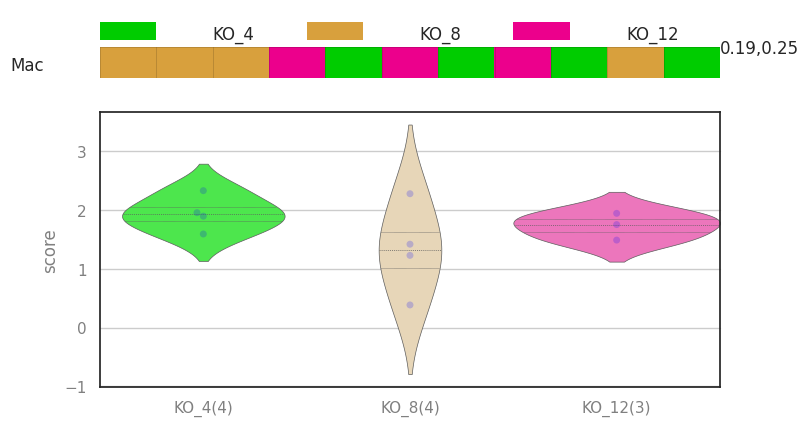

In [87]:
## SMaRT clusters
#wt1,l1 = getCls13a14a3()
#wt1,l1 = getCls1a2a4()
#wt1,l1 = getCls14a3()
#wt1,l1 = getCls13()
#wt1,l1 = getCls14()
#wt1,l1 = getCls1()
#wt1,l1 = getCls2()
#wt1,l1 = getCls3()
#wt1,l1 = getCls4()

## other kinds of genes
#wt1, l1 = getTSMm()
#wt1, l1 = getTSC1Mm()
#wt1, l1 = getSingleGene('Nr1d1')
#wt1, l1 = getSingleGene('Dbp')

#wt1, l1 = getKellerGenesMm()

wt1, l1 = getKellerGenesC1Mm()
#wt1, l1 = getKellerGenesC2Mm()
#wt1, l1 = getKellerGenesC4Mm()
#wt1, l1 = getKellerGenesC2a4Mm()
#wt1, l1 = getKellerGenesC1a2a4Mm()

#convert to Mm genes (if the validation dataset is for Mm)
#l1 = mut.getGroupsMm(l1)

#load the base
ana = IMMAnalysis()

##load the dataset to analyze
#ana.getKeller2009(td=3)
#ana.getPG2023(stype=0)
#ana.getJouffe2022()
#ana.getOkabe2016()

##plot the figure
#ana.orderData(l1, wt1)
#fig = plotViolinBarVert(ana, "Mac")


## Validation
ana.getPG2023(stype=2)

#plot the figure
ana.orderData(l1, wt1)
fig = plotViolinBarVert(ana, "Mac")

In [85]:
for gidx1 in range(0,len(ana.state)):
    for gidx2 in range(0, len(ana.state)):
        if gidx1 < gidx2:
            grp1 = [ana.f_ranks[i-ana.h.start] for i in ana.state[gidx1]]
            grp2 = [ana.f_ranks[i-ana.h.start] for i in ana.state[gidx2]]
            t, p = ttest_ind(grp1, grp2, equal_var=False)
            if not math.isnan(p) and p <= 0.05:
                print(f'{ana.atypes[gidx1]} vs {ana.atypes[gidx2]}: {p:0.04f}')

WT_4 vs WT_8: 0.0203
WT_4 vs WT_12: 0.0084
WT_4 vs KO_12: 0.0288
WT_8 vs KO_4: 0.0299


In [78]:
x = np.array(range(1,13))
y = []
for i in x: 
    y.append([np.round(ana.f_ranks[j-ana.h.start],2) for j in ana.state[i-1]])
y = [item for sublist in y for item in sublist]

print(f'x: {x}')
print(f'y: {y}')

x: [ 1  2  3  4  5  6  7  8  9 10 11 12]
y: [-0.93, -2.24, -1.86, -0.54, -0.61, -0.97, -1.22, -2.01, -1.6, -0.5, -1.76, -1.39]


------------------------------
Fitting Statistics
------------------------------
MSE: 0.0490
R^2: 0.5499

------------------------------
Fitted Parameters
------------------------------
Amplitude: -0.6247
Frequency: 1.2194
Phase: -1.4010
Offset: -1.2838
------------------------------


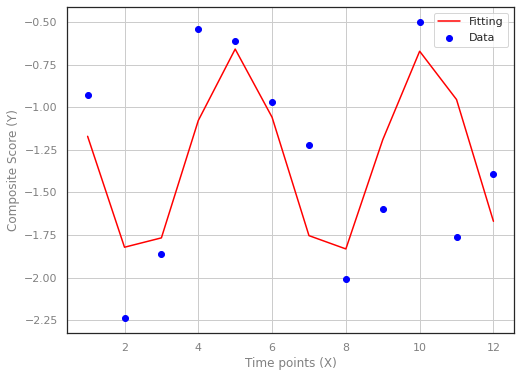

,Model,MSE,R^2
0,C#1(k),0.0070,0.9498
1,C#2(k),0.0118,0.8908
2,C#4(k),0.0243,0.7710
3,C#2-4(k),0.0490,0.5499


In [81]:
#Fitting a periodic function to the timed scores
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

def sine_function(x, amp, freq, phase, offset):
    return amp * np.sin(freq * x + phase) + offset

def cosine_function(x, amp, freq, phase, offset):
    return amp * np.cos(freq * x + phase) + offset

initial_guesses = [1.0, 1.0, 0.0, 0.0]
params, params_covariance = curve_fit(sine_function, x, y, p0=initial_guesses)
amp_fit, freq_fit, phase_fit, offset_fit = params
y_fit = sine_function(x, amp_fit, freq_fit, phase_fit, offset_fit)
#print(f'Y: {y}\nY_fit: {y_fit}')
r2 = r2_score(y, y_fit)
scaler = MinMaxScaler()
y_normalized = scaler.fit_transform(np.array(y).reshape(-1, 1))
y_fit_normalized = scaler.transform(np.array(y_fit).reshape(-1, 1))
residuals = y - y_fit
mse = mean_squared_error(y_normalized, y_fit_normalized)

print('-'*30)
print('Fitting Statistics')
print('-'*30)
#print(f"Residuals: {residuals}")
print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}\n")

print('-'*30)
print('Fitted Parameters')
print('-'*30)
print(f"Amplitude: {amp_fit:.4f}")
print(f"Frequency: {freq_fit:.4f}")
print(f"Phase: {phase_fit:.4f}")
print(f"Offset: {offset_fit:.4f}")
print('-'*30)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data", color='blue')
plt.plot(x, y_fit, label="Fitting", color='red')
plt.xlabel("Time points (X)")
plt.ylabel("Composite Score (Y)")
plt.grid()
plt.legend()
plt.show()

#summary of fitting results
df_summary = pd.DataFrame(columns=['Model','MSE','R^2'])
results = [['C#1(k)', 0.0070, 0.9498],
           ['C#2(k)', 0.0118, 0.8908],
           ['C#4(k)', 0.0243, 0.7710],
           ['C#2-4(k)', 0.0490, 0.5499]
          ]
df_summary = pd.DataFrame(results, columns=df_summary.columns)
display(df_summary)

Keller 2009 Circadian peritoneal mac (n = 12)
GSE25585 http://hegemon.ucsd.edu/Tools/explore.php?key=mac&id=MAC80
6 [1, 1, 1, 1, 1, 1] GSE25585 http://hegemon.ucsd.edu/Tools/explore.php?key=mac&id=MAC80 MAC80
[2]
x: [1 2 3 4 5 6]
y: [1.05, 0.84, -0.28, -0.61, 0.21, 0.75]
------------------------------
Fitting Statistics
------------------------------
MSE: 0.0056
R^2: 0.9581



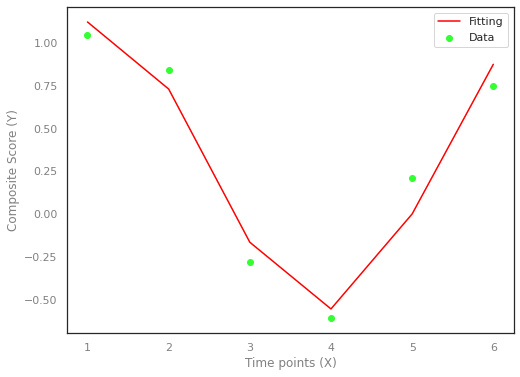

In [67]:
#TESTING

ana.getKeller2009(td=0)
#ana.getPG2023()
#ana.getJouffe2022()
#ana.getOkabe2016()

#plot the figure
ana.orderData(l1, wt1)
#fig = plotViolinBarVert(ana, "Mac")

#x = [float(val) for val in ana.atypes] + [24.0 + float(val.split) for val in ana.atypes]
x1 = range(1,7)
#x = [float(item[1:]) for item in ana.atypes]
#x = [float(val) for val in ana.atypes]
#x = [float(val[1:]) for val in ana.atypes[0:6]] + [24.0 + float(val[1:]) for val in ana.atypes[6:12]]

x1 = np.array(x1)
y1 = []
for i in x1: 
    y1.append([np.round(ana.f_ranks[j-ana.h.start],2) for j in ana.state[i-1]])
y1 = [item for sublist in y1 for item in sublist]

print(f'x: {x1}')
print(f'y: {y1}')

y1_fit = sine_function(x1, amp_fit, freq_fit, phase_fit, offset_fit)
y1_normalized = scaler.fit_transform(np.array(y1).reshape(-1, 1))
y1_fit_normalized = scaler.transform(np.array(y1_fit).reshape(-1, 1))
r2 = r2_score(y1, y1_fit)
residuals = y1 - y1_fit
mse = mean_squared_error(y1_normalized, y1_fit_normalized)
print('-'*30)
print('Fitting Statistics')
print('-'*30)
#print(f"Residuals: {residuals}")
print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, label="Data")
plt.plot(x1, y1_fit, label="Fitting", color='red')
plt.xlabel("Time points (X)")
plt.ylabel("Composite Score (Y)")
plt.legend()
plt.show()

In [21]:
TS_C1 = ['CYB561', 'NR1D1', 'SLPI', 'TCN1', 'TIAM2', 'NPEPL1', 'EPHX2', 'DTYMK', 'MEGF6']

WT_4 vs WT_8 -3.55, 0.0652
WT_4 vs WT_12 -2.98, 0.0467
WT_4 vs KO_4 -0.696, 0.527
WT_4 vs KO_8 -2.66, 0.0682
WT_4 vs KO_12 -3.09, 0.0281
WT_8 vs WT_12 1.65, 0.191
WT_8 vs KO_4 3.46, 0.0733
WT_8 vs KO_8 1.31, 0.262
WT_8 vs KO_12 2.81, 0.1
WT_12 vs KO_4 2.87, 0.0621
WT_12 vs KO_8 -0.296, 0.778
WT_12 vs KO_12 1.68, 0.178
KO_4 vs KO_8 -2.55, 0.083
KO_4 vs KO_12 -3.45, 0.0517
KO_8 vs KO_12 1.66, 0.188


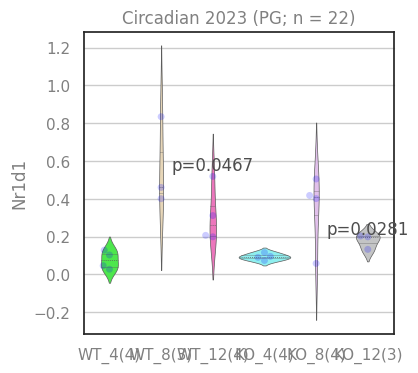

In [33]:
ax,bp = ana.printGene(TS_C1[1], None, {'w':4, 'h':4, 'vert':1, 'violin':1})

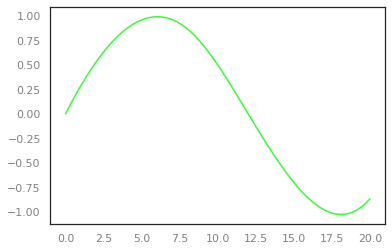

In [26]:
T = [0,4,8,12,16,20]
sin_T = [math.sin(t/24 * 2 * math.pi) for t in T]

#smoothening
T_new = np.linspace(min(T), max(T), 300) 
spl = make_interp_spline(T, sin_T, k=3) 
sin_T_new = spl(T_new)

plt.plot(T_new, sin_T_new)
plt.show()